# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
data=pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.loc[data['Sales'] >=8.5,'sales']= 'high'
data.loc[data['Sales'] <8.5,'sales']= 'low'

In [5]:
data.drop('Sales',axis=1,inplace=True)

In [6]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [8]:
data.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [9]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['US']=label_encoder.fit_transform(data['US'])
data['US'].unique()

array([1, 0])

In [10]:
label_encoder = preprocessing.LabelEncoder() 
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [11]:
label_encoder = preprocessing.LabelEncoder() 
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 

In [12]:
data.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high


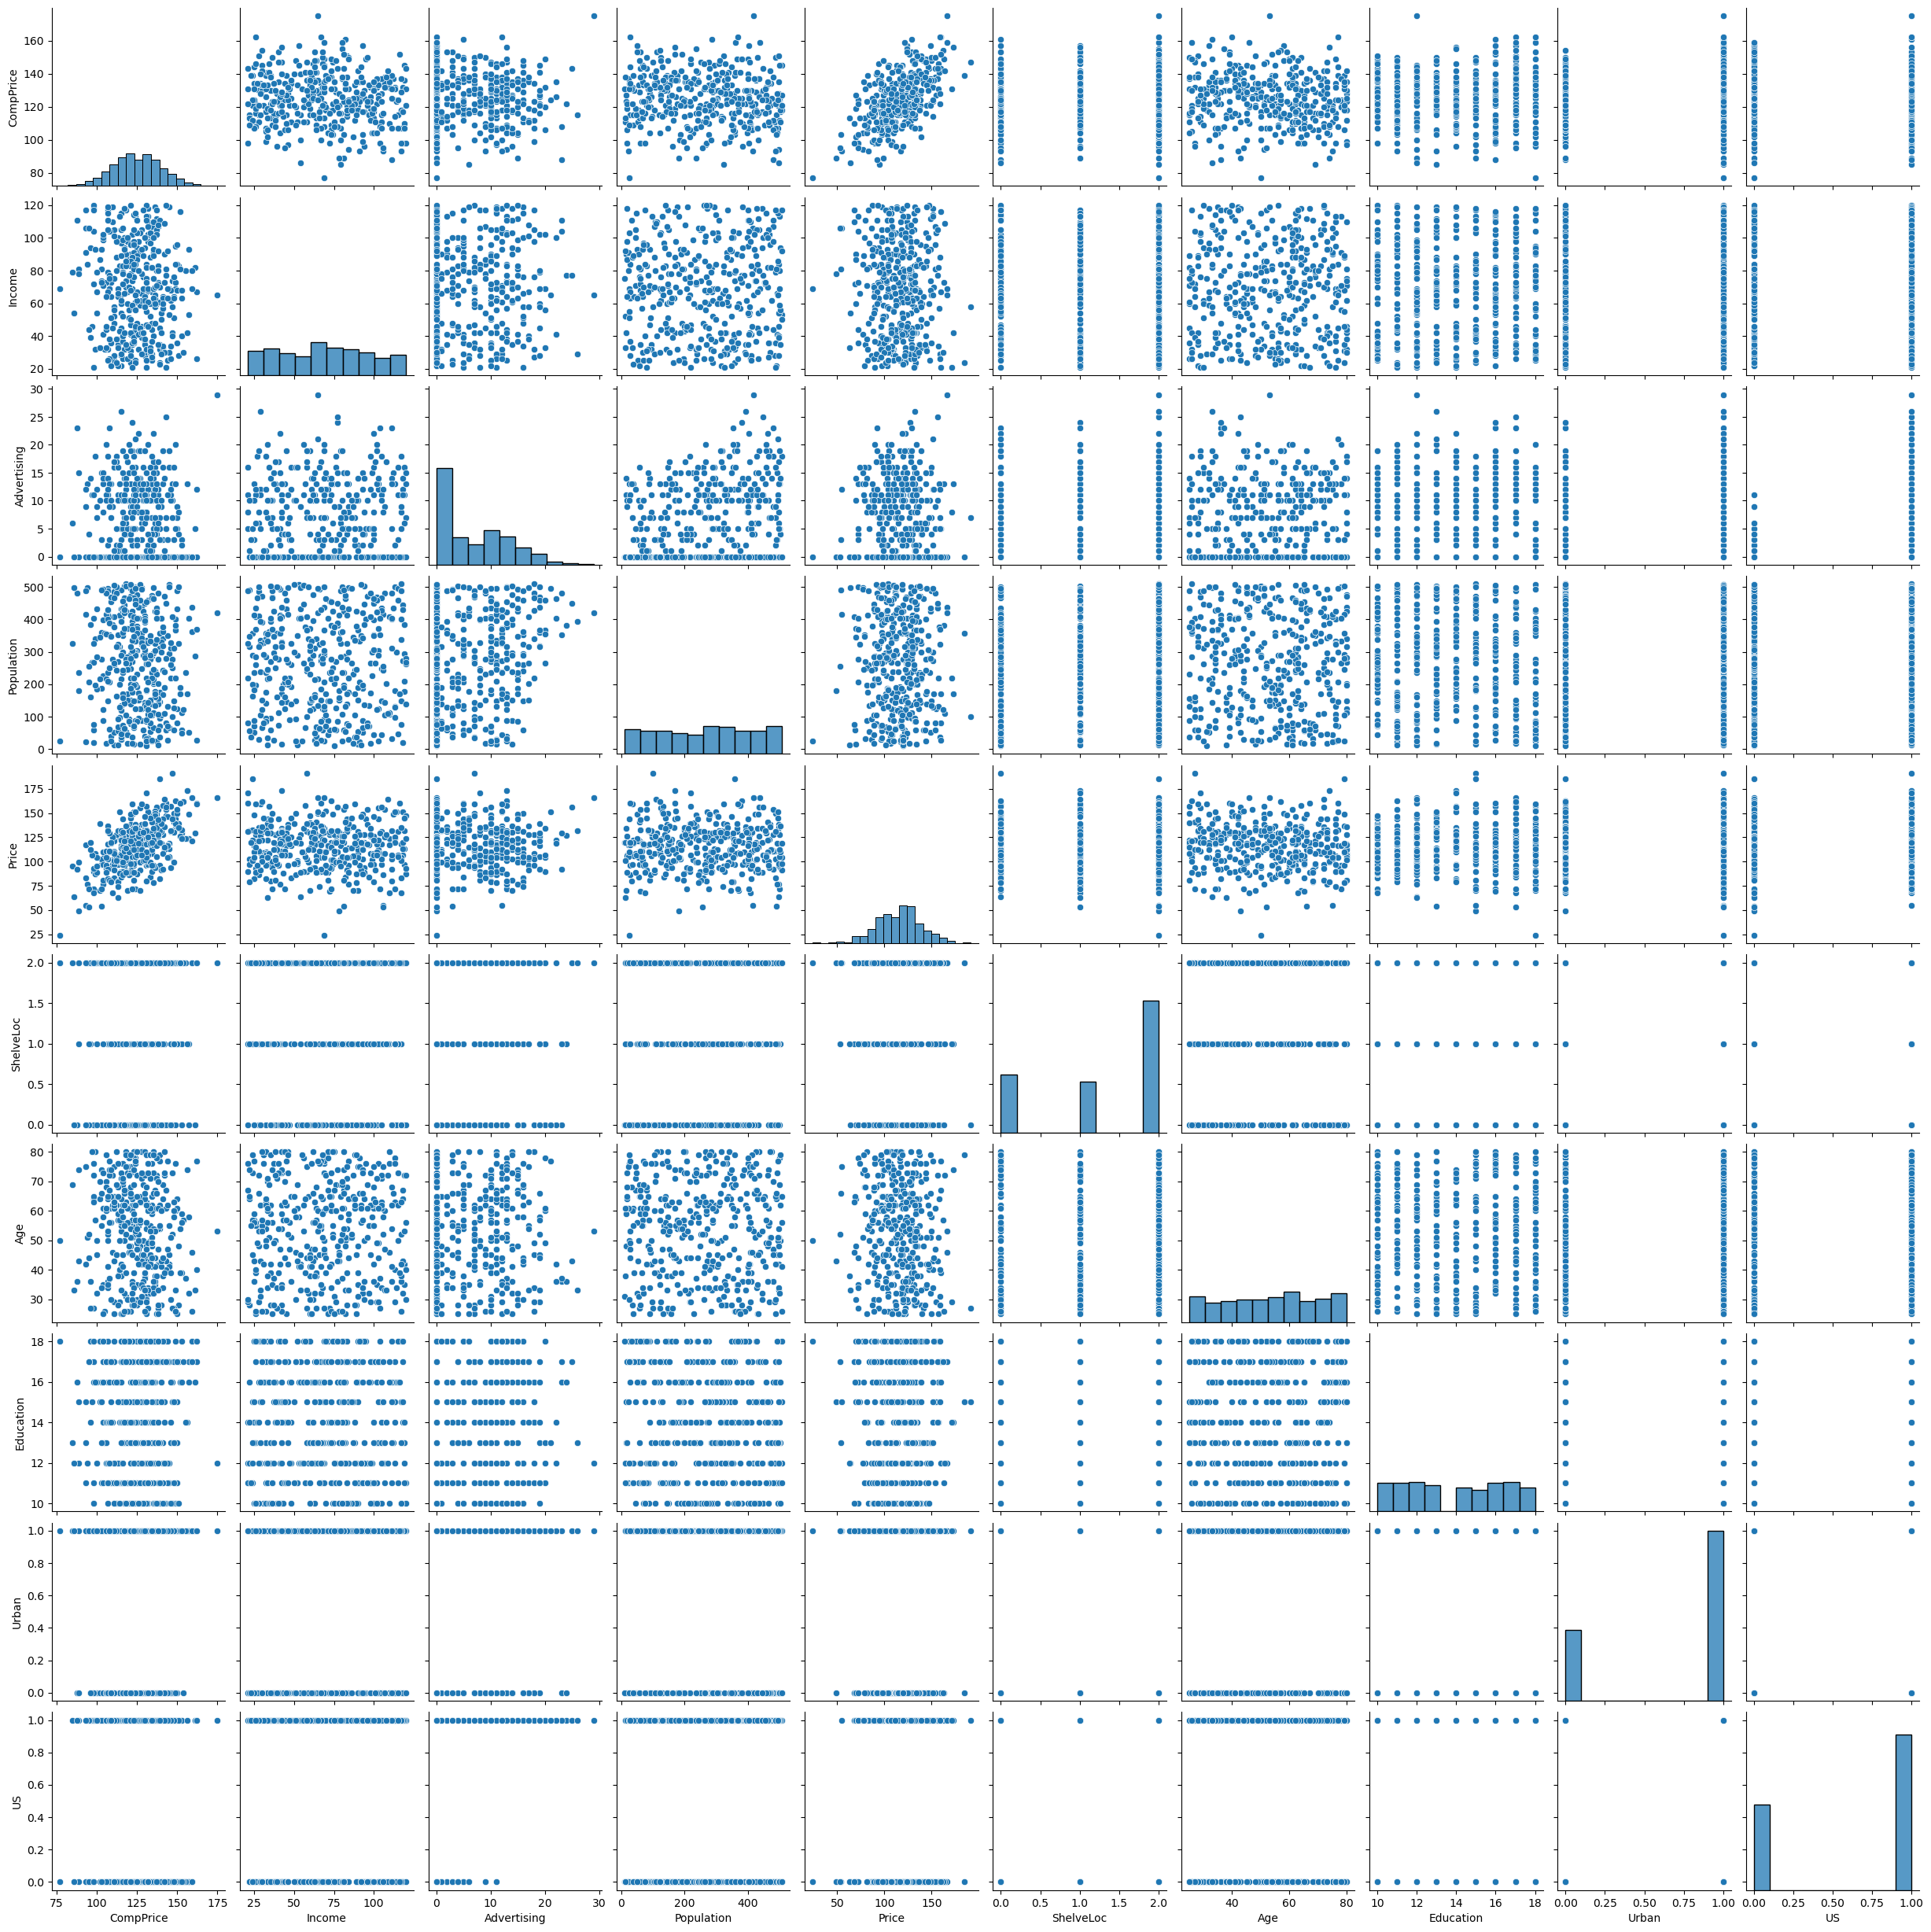

In [13]:
sns.pairplot(data)

In [14]:
colnames = list(data.columns)
predictors = colnames[0:10]
target = colnames[10]

In [15]:
predictors

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [16]:
target

'sales'

In [17]:
data.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc       int32
Age             int64
Education       int64
Urban           int32
US              int32
sales          object
dtype: object

In [18]:
label_encoder = preprocessing.LabelEncoder() 
data['sales']= label_encoder.fit_transform(data['sales'])

In [19]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size = 0.2,random_state=4)

In [20]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

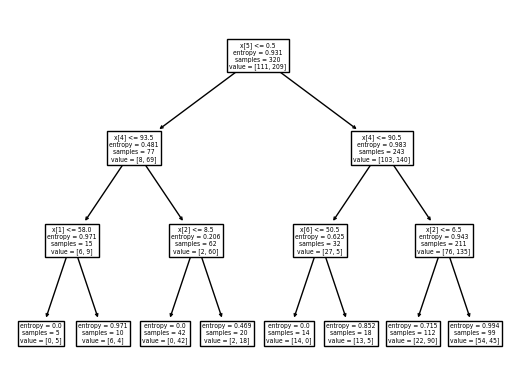

In [21]:
tree.plot_tree(model);

In [23]:
preds = model.predict(test[predictors])
preds

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [24]:
pd.Series(preds).value_counts()

pd.crosstab(test[target],preds)

col_0,0,1
sales,,
0,25,7
1,12,36


In [25]:
np.mean(preds==test[target])

0.7625